# Dynamic Programming

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
from utils import random_graph, create_adjacency_matrix
import math

In [2]:
# If AttributeError: module 'scipy.sparse' has no attribute 'coo_array'
# pip install --upgrade scipy networkx

# Number of nodes in graph (User Input)
n = 10

def create_graph(n, is_directed = True, is_complete = True):
    """
    Creates a directed and/or completed graph with n nodes
    
    :n: number of nodes in the graph
    :is_directed: is graph directed - default: True
    :is_complete: is graph complete - default: True
    
    :returns (default: a directed complet) nx.graph
    """
    if is_directed:
        graph = random_graph(n, True)
    else:
        graph = random_graph(n)
    if not is_complete:
        for i in range(0, math.floor(n / 2)):
            edges_to_remove = random.sample(range(0,n-1), 2)
            graph.remove_edge(edges_to_remove[0], edges_to_remove[1])
    return graph

created_graph = create_graph(n)
adj_graph = create_adjacency_matrix(created_graph)
distance_matrix = adj_graph.todense().tolist()
print(distance_matrix)

[[0.0, 0.1101937662190602, 0.5614957781894206, 0.41881711517836523, 0.658166496554301, 0.32031687696669575, 0.4359298298446498, 0.6753502686848961, 0.5876840425005161, 0.26965934776677364], [0.7741798350876117, 0.0, 0.47611103534535676, 0.4034638200539239, 0.5507700639930703, 0.4098727889693714, 0.4667884371993238, 0.6240589474893231, 0.5140387472690564, 0.24517899096184095], [0.2341754120594922, 0.5898162907464756, 0.0, 0.8068958195698281, 0.49740881947625154, 0.7082493354856174, 0.5385283553636335, 0.26619206675213675, 0.7345920862046612, 0.35418210161596614], [0.6977894783486999, 0.16144551605071703, 0.48698114093675465, 0.0, 0.595857078279125, 0.7085232757495206, 0.8535162706969678, 1.0067181367977902, 0.31089961394172844, 0.6486279751553542], [0.13441707321279303, 0.678876284509408, 0.23473547627882865, 0.6247606974741913, 0.0, 0.9506745288866326, 0.9115946392015519, 0.7636004473581349, 0.3511766410746766, 0.6536903740847321], [0.6843469397432489, 0.08987822788196524, 0.5030677529

/Users/danielpark/Documents/directed-salesman/utils.py:123: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return nx.adjacency_matrix(graph)


In [3]:
# Memoize for Top-Down Recursion
cache = [[-1]*(1 << (n)) for _ in range(n)]
solution_path = []

def dp_runner(i, bitmask):
    """
    Traverses the graph and finds the shortest Hamiltonian path on a graph 
    using dynamic programming by caching inner paths to find most optimal path

    :i: ith node
    :bitmask: represents the remaining nodes in the subset (TODO: bits are faster to operate)

    :returns: cost of the most efficient path
    """
    
    # Base case: 
    # if only ith bit and 1st bit is set in our bitmask
    # we have visited all other nodes already
    if bitmask == ((1 << i) | 3):
        return distance_matrix[1][i]
  
    # Memoize visited distances
    if cache[i][bitmask] != -1:
        return cache[i][bitmask]
    
    # Result of the sub-problem
    result = 10**9
  
    # Travel to all nodes j and end the path at ith node
    for j in range(1, n):
        if (bitmask & (1 << j)) != 0 and j != i and j != 1:
            result = min(result, dp_runner(j, bitmask & (~(1 << i))) + distance_matrix[j][i])
    
    # Store minimum value
    cache[i][bitmask] = result
    return result

The cost of most efficient path is 2.6394072924277747


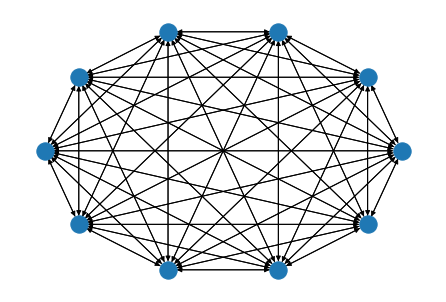

In [4]:
# Driver program
cost = 10**9

# Go from node 1 visiting all nodes in between to i
# Return to i when complete
for i in range(1, n):
    cost = min(cost, dp_runner(i, (1 << n)-1) + distance_matrix[i][1])

print(f"The cost of most efficient path is {cost}")
nx.draw_circular(created_graph)

## Sources

1. https://www.youtube.com/watch?v=Q4zHb-Swzro&t=118s&ab_channel=AbdulBari
2. http://www.lsi.upc.edu/~mjserna/docencia/algofib/P07/dynprog.pdf
3. https://medium.com/basecs/speeding-up-the-traveling-salesman-using-dynamic-programming-b76d7552e8dd
4. https://www.geeksforgeeks.org/travelling-salesman-problem-using-dynamic-programming/#:~:text=Travelling%20Salesman%20Problem%20(TSP)%3A,returns%20to%20the%20starting%20point.
5. https://www.geeksforgeeks.org/traveling-salesman-problem-tsp-implementation/
6. https://networkx.org/documentation/stable/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html
7. https://people.eecs.berkeley.edu/~vazirani/algorithms/chap6.pdf
8. https://realpython.com/python-bitwise-operators/